###  CODSOFT TASK 4

###  SALES PREDICTION USING PYTHON

#### NAME : Ashwini G
#### BATCH : A11
#### DOMAIN : Data Science

##### Aim : To build a model to predict the sales of Advertising in Newspaper, Radio and Television

In [1]:
from IPython.display import Image
Image(url="https://as2.ftcdn.net/v2/jpg/02/50/22/87/1000_F_250228732_oeJ9bdjXySG1hIVKLZpm2mD1vGK2T4u7.jpg", height=400,width=1000)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### from the mean value TV has the highest expensable platform for sales. Whereas Radio has the lowest expensable platform for sales.

In [7]:
from matplotlib import style

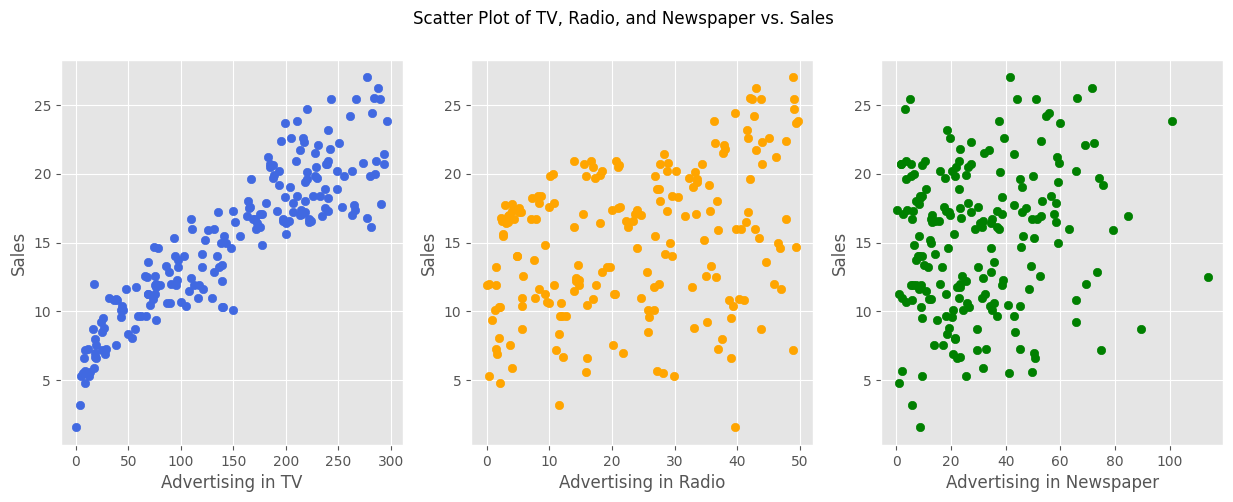

In [8]:
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle('Scatter Plot of TV, Radio, and Newspaper vs. Sales')
plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'],color='royalblue')
plt.xlabel('Advertising in TV')
plt.ylabel('Sales')
plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'],color='orange')
plt.xlabel('Advertising in Radio')
plt.ylabel('Sales')
plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'],color='green')
plt.xlabel('Advertising in Newspaper')
plt.ylabel('Sales')
plt.show()
plt.show()

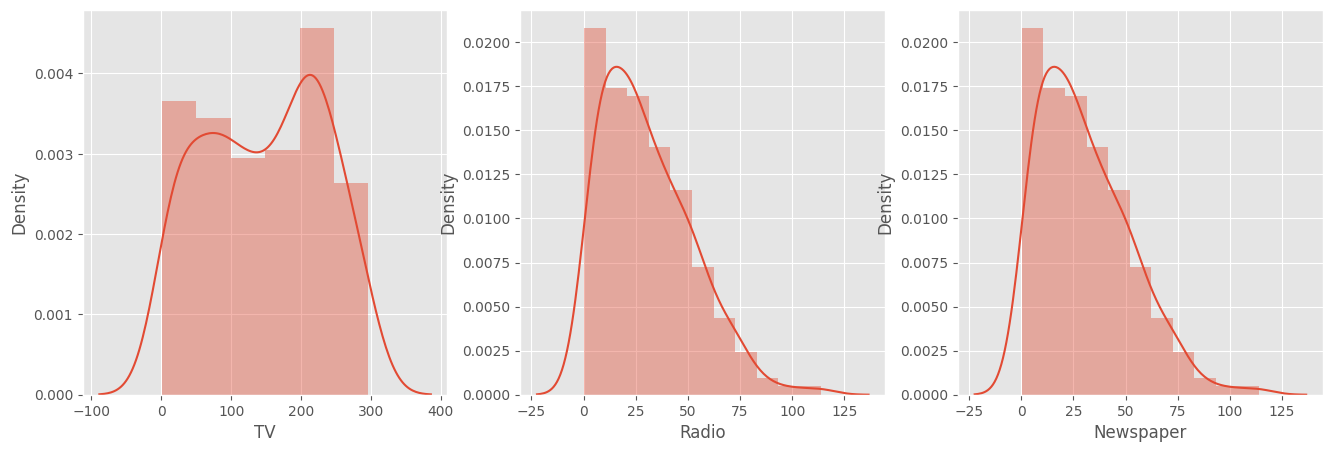

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['TV'])
plt.xlabel('TV')
plt.subplot(1,3,2)
sns.distplot(data['Newspaper'])
plt.xlabel('Radio')
plt.subplot(1,3,3)
sns.distplot(data['Newspaper'])
plt.xlabel('Newspaper')
plt.show()

### TV as high variance in their density comparitively to Radio and Newspaper.

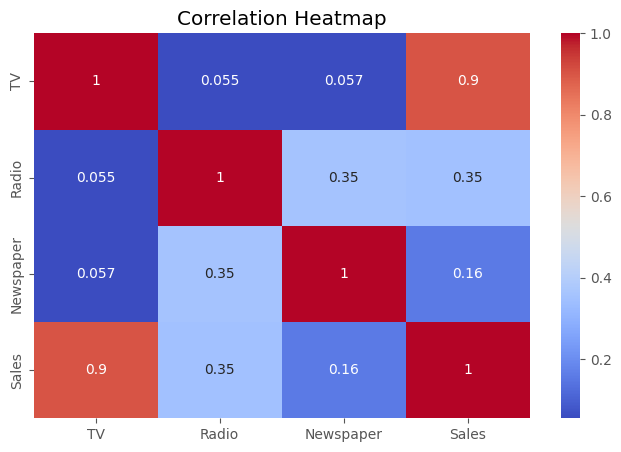

In [10]:
correlation_matrix=data.corr()
plt.figure(figsize=(8,5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### From this correlation map we understand that TV has highly correlated. so, I choose x data as TV and y as Sales.

In [11]:
x=data[['TV']]
y=data[['Sales']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
def class_evaluation(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    
    print('Mean absolute error :', mae)
    print('Mean squared error :', mse)
    print('R2_ score :', r2)
    print('Root Mean squared error',rmse)
    
def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))

### Build a model Using Ada boost regressor

In [16]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
ypred_adr=adr.predict(x_test)
train_test_score(adr)

Training Score 0.8484781446561936
Testing score 0.8210132796546433


In [17]:
class_evaluation(y_test,ypred_adr)

Mean absolute error : 1.8911151054593844
Mean squared error : 5.388997307436792
R2_ score : 0.8210132796546433
Root Mean squared error 2.3214213980742042


### Prediction of sales using Adaboost Regressor

In [18]:
data['Sales_predict']=adr.predict(x)
data.head()

,TV,Radio,Newspaper,Sales,Sales_predict
0,230.1,37.8,69.2,22.1,19.824590
1,44.5,39.3,45.1,10.4,10.738462
2,17.2,45.9,69.3,12.0,9.107692
3,151.5,41.3,58.5,16.5,14.515789
4,180.8,10.8,58.4,17.9,18.777273


####  Regression plot for Actual sales rate and predicted sales rate.

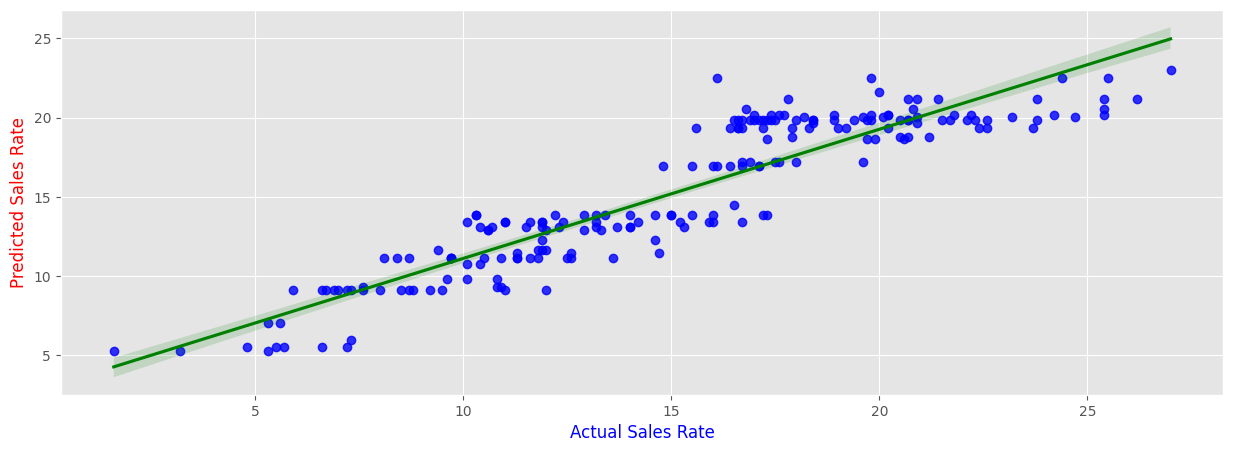

In [19]:
plt.figure(figsize=(15,5))
sns.regplot(x=data['Sales'],y=data['Sales_predict'],color='blue',line_kws={"color": "green"})
plt.xlabel('Actual Sales Rate',color='blue')
plt.ylabel('Predicted Sales Rate',color='red')
plt.show()

#### comparing the denisty of Actual sales rate and predicted sales rate using Distplot.

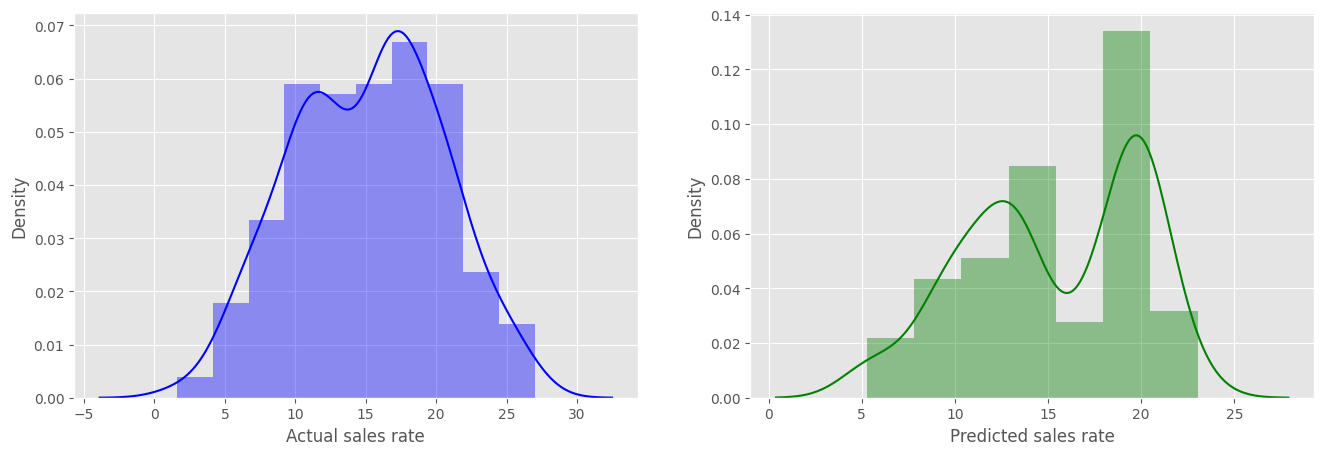

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Sales'],color='blue',hist_kws={'density': True})
plt.xlabel('Actual sales rate')
plt.subplot(1,2,2)
sns.distplot(data['Sales_predict'],color='green',hist_kws={'density': True})
plt.xlabel('Predicted sales rate')
plt.show()